In [ ]:
# tweets=api.user_timeline(screen_name='RealDonaldTrump', count=20)
#print(tweets)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import re

In [3]:
ACCESS_TOKEN="1114257900657106945-1dCAiAhqC8Dn7N0SYchfrcPBJNnO3R"
ACCESS_TOKEN_SECRET="9q6svuksiWxwxYggI5hVWgY8ZLrXESSMUAnGYNkEp97By"
CONSUMER_SECRET="g4CkmDKmbv2jNxm2yQOmth8NWOthgCgDSZGP1vBRuP5v4g6ZhD"
CONSUMER_KEY="eOqXos4xUTFpuv0uxPYCvRIpH"

In [4]:
def twitter_setup():
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET) # Authorization to consumer key and consumer secret
    auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET) # Access to user's access key and access secret 
    api = tweepy.API(auth)  # Return API with authentication:
    return api

In [129]:
hashtag=input('Enter hashtag to search about:')

Enter hashtag to search about:#DontCallMeAngel


Number of tweets extracted: 100.



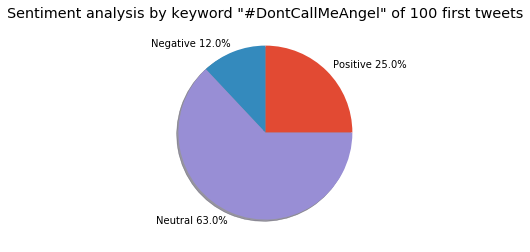

,Tweet,Sentiment,len,date,source,likes,retweets,user_id,user_name,number of followers
0,Ariana Grande Twitter promoting Miley Cyrus Tw...,0.0,140,2019-09-13 15:30:46,Twitter for iPhone,0,655,1172533083200983040,whsofiia,3146
1,call them angels just blessed with collab Lis...,0.0,140,2019-09-13 15:30:43,Twitter for iPhone,0,1800,1172533070169354241,whsofiia,3146
2,unite Listen power collab,0.0,140,2019-09-13 15:30:43,Twitter for iPhone,0,2937,1172533070144004096,Christieng97,238
3,Ariana Grande Twitter promoting Miley Cyrus Tw...,0.0,140,2019-09-13 15:30:42,Twitter for iPhone,0,655,1172533068520919042,nfr_ary,249
4,director ariana gorgeous want video ariana,0.7,132,2019-09-13 15:30:42,Twitter for Android,0,171,1172533068017655808,airiananeedy,563


In [130]:
# Extracting tweets by a key word
extractor = twitter_setup()
tweets = extractor.search(q=hashtag, count=500, lang='en')

print("Number of tweets extracted: {}.\n".format(len(tweets)))

# Creating a DataFrame with extracted tweets
tweet_text=[]
for tweet in tweets[:]:
    text=TextBlob(tweet.text)
    tweet_text.append(tweet.text)
data_on_new_hashtag={'Tweet': tweet_text}
df=pd.DataFrame(data_on_new_hashtag)

# Tweets cleaning

clean_tweets=[]
for tweet in df.Tweet :
    tweet=re.sub(r'@[A-Za-z0-9]+','',tweet) # Remove @username
    tweet=re.sub('https?://[A-Za-z0-9./]+','', tweet) # Remove https links
    tweet = re.sub(r'\b\w{1,3}\b', '', tweet) # Remove small words
    tweet = ''.join(c for c in tweet if c <= '\uFFFF')  # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = re.sub(r'\&\w*;', '', tweet) # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub('[!@$:]', '', tweet) # Remove some special characters
    tweet = tweet.lstrip(' ') # Removing the blank space at the beginning
    tweet = re.sub(r'#\w*', '', tweet) # Remove hashtags
    tweet=re.sub('[^A-Za-z0-9]+', ' ', tweet)
    clean_tweets.append(tweet)
    
# Sentiment analysis on cleaned tweets

neutral=0
positive=0
negative=0
polarity=[]

for tweet in clean_tweets:
    text=TextBlob(tweet)
    polarity.append(text.sentiment.polarity)

# Assigning all values to three categories: positive, negative and neutral sentiment

    if text.sentiment.polarity == 0:
        neutral += 1 # The + operation adds the array elements to the original array.
    elif text.sentiment.polarity > 0:
        positive += 1
    else: negative +=1
        
# Calculating the percentage of positive, negative and neutral sentiment

neutral_percent=round(neutral/len(polarity)*100,2)
positive_percent=round(positive/len(polarity)*100,2)
negative_percent=round(negative/len(polarity)*100,2)

# Plotting a pie chart
labels='Positive '+str(positive_percent)+'%', 'Negative '+str(negative_percent)+'%', 'Neutral '+str(neutral_percent)+'%'
sizes=[positive_percent, negative_percent, neutral_percent]
plt.title('Sentiment analysis by keyword "'+str(hashtag)+'" of '+str(len(polarity))+' first tweets')
plt.pie(sizes, labels=labels, shadow=True)

plt.show()

# Creating DataFrame (updating the previous one) with cleaned tweets and addtional interesting information on them 

df['Tweet']=clean_tweets
df['Sentiment']=polarity
df['len']=np.array([len(tweet.text) for tweet in tweets])
df['date']=np.array([tweet.created_at for tweet in tweets])
df['source']=np.array([tweet.source for tweet in tweets])
df['likes']=np.array([tweet.favorite_count for tweet in tweets])
df['retweets']=np.array([tweet.retweet_count for tweet in tweets])
df['user_id']=np.array([tweet.id for tweet in tweets])
df['user_name']= np.array([tweet.user._json['screen_name'] for tweet in tweets])
df['number of followers']=np.array([tweet.user._json['followers_count'] for tweet in tweets])

df.head()

In [142]:
df['calculated_field']=df.Sentiment*df['number of followers']*df.retweets
df.sort_values(by='calculated_field', ascending=False)
round(df.calculated_field.sum(),2)

7537948.38

In [153]:
df.nsmallest(10, 'calculated_field')

,Tweet,Sentiment,len,date,source,likes,retweets,user_id,user_name,number of followers,calculated_field
80,these bitches sickening,-0.900000,90,2019-09-13 15:29:52,Twitter for Android,0,596,1172532858621243392,steadofghostin_,370,-198468.000000
81,lana carrying rotisserie chicken knife vibe re...,-0.600000,140,2019-09-13 15:29:51,Twitter for iPhone,0,709,1172532855051902979,Kellyybenco,391,-166331.400000
51,lana carrying rotisserie chicken knife vibe re...,-0.600000,140,2019-09-13 15:30:13,Twitter for iPhone,0,709,1172532944981770240,donovanjw7,209,-88908.600000
34,SICK FUCKING Cyrus Miley 2019,-0.657143,105,2019-09-13 15:30:28,Twitter for Android,0,317,1172533008462680066,Agustiina_21,273,-56869.800000
6,name with little RESPECT,-0.187500,97,2019-09-13 15:30:42,Twitter Web App,0,133,1172533066079907840,thehungermiles,1768,-44089.500000
58,name with little RESPECT,-0.187500,97,2019-09-13 15:30:08,Twitter for iPhone,0,133,1172532923880431617,Lipeeking,644,-16059.750000
84,Lana Miley Cyrus Ariana Grande behind scenes,-0.400000,124,2019-09-13 15:29:51,Twitter for Android,0,26,1172532853902413824,Mayshmellow,1503,-15631.200000
7,Lana Miley Cyrus Ariana Grande behind scenes,-0.400000,124,2019-09-13 15:30:41,Twitter for iPhone,0,26,1172533062229348353,ysadelrey,911,-9474.400000
13,appreciate watch drop down pick back county line,-0.077778,140,2019-09-13 15:30:39,Twitter for iPhone,0,4,1172533054239399937,DanielsonSerrao,22465,-6989.111111
42,Lana Miley Cyrus Ariana Grande behind scenes,-0.400000,124,2019-09-13 15:30:23,Twitter for iPhone,0,26,1172532987637858304,_alerievaay,360,-3744.000000


In [156]:
df.Sentiment.min()

-0.9

In [114]:
import nltk

In [118]:
#Tokenization (splitting text into a list of words) 
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
 
tokenized_tweets=[]
for tweet in clean_tweets:
    tokenized_tweets.append(tweet_tokenizer.tokenize(tweet))
tokenized_tweets[:5]

[['song', 'trash', 'catchy', 'except', 'part'],
 [],
 ['calling', 'angels', 'music', 'video', 'stream', 'watch', 'http'],
 ['take', 'moment', 'appreciate', 'miley', 'arms', 'holy', 'fuck'],
 ['video', 'shoot', 'everywhere']]

In [127]:
import itertools
merged = list(itertools.chain.from_iterable(tokenized_tweets))

In [121]:
from collections import Counter

In [128]:
Counter(merged).most_common(10)
#To see from positive and negative the difference

[('video', 21),
 ('lana', 20),
 ('song', 13),
 ('ariana', 12),
 ('miley', 11),
 ('music', 10),
 ('angel', 9),
 ('that', 8),
 ('call', 8),
 ('angels', 7)]

In [154]:
#np.array([tweet.entities['hashtags'] for tweet in tweets])

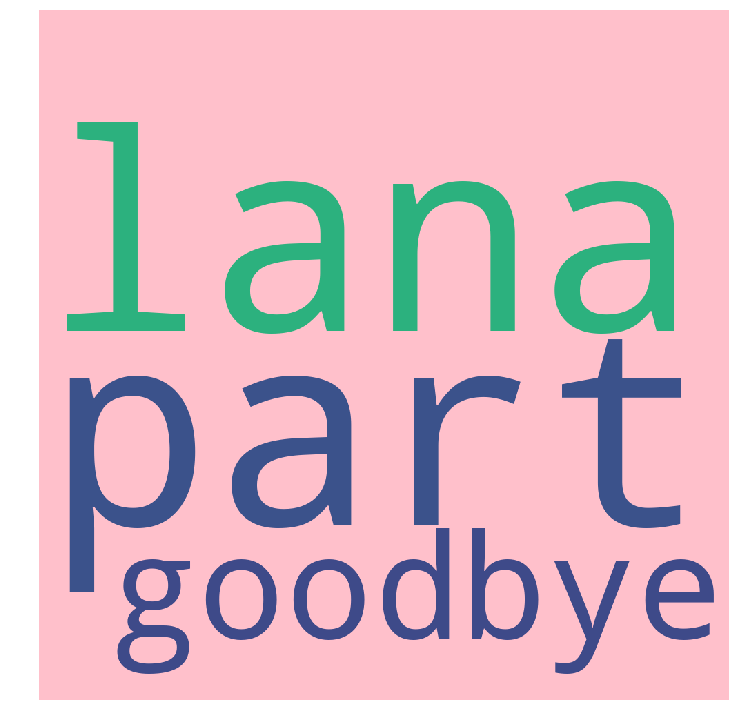

In [157]:
comment_words = ' ' #We will be appending the words to this var
stopwords = set(STOPWORDS) #Finds all stop words in the set of tweets.
for val in df.Tweet:
   val = str(val) #convert all tweet content into strings
   tokens = val.split() #Split all strings into individual components
   for i in range(len(tokens)):
      tokens[i] = tokens[i].lower() #Converts all the individual strings to lower case.
for words in tokens:
   comment_words = comment_words + words + ' '
wordcloud=WordCloud(width=1000,height=1000, background_color='pink', stopwords=stopwords,min_font_size=6).generate(comment_words)
#All of this is a single line
plt.style.use('ggplot')
plt.figure(figsize=(10,10),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [160]:
df.date.max()-df.date.min()

Timedelta('0 days 00:01:07')

In [165]:
# def tweets_to_data_frame(self, tweets):
df=pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
        
#df['id'] = np.array([tweet.id for tweet in tweets])
df['len']=np.array([len(tweet.text) for tweet in tweets])
df['date']=np.array([tweet.created_at for tweet in tweets])
df['source']=np.array([tweet.source for tweet in tweets])
df['likes']=np.array([tweet.favorite_count for tweet in tweets])
df['retweets']=np.array([tweet.retweet_count for tweet in tweets])
df['polarity']=polarity
        
df.head()

,Tweets,len,date,source,likes,retweets,polarity
0,RT @thereidfeed: Ariana Grande: *on Twitter pr...,140,2019-09-13 15:30:46,Twitter for iPhone,0,655,0.0
1,RT @Spotify: Don't call them angels 👼🏼👼🏼👼🏼\n@A...,140,2019-09-13 15:30:43,Twitter for iPhone,0,1800,0.0
2,RT @AppleMusic: .@ArianaGrande x @MileyCyrus x...,140,2019-09-13 15:30:43,Twitter for iPhone,0,2937,0.0
3,RT @thereidfeed: Ariana Grande: *on Twitter pr...,140,2019-09-13 15:30:42,Twitter for iPhone,0,655,0.0
4,RT @ag5leaks1: director: ariana how gorgeous d...,132,2019-09-13 15:30:42,Twitter for Android,0,171,0.7
